In [11]:
import os
import numpy as np
import shutil
path = '/data3/ian/dsmil-wsi/dsmil-wsi/test_patches/big'
dirs = os.listdir(path)
for d in dirs:
    dirc = os.path.join(path,d)
    files = os.listdir(dirc)
    files = sorted(files)
    files = files[:-1]
    sp = int(len(files)/2)
    print(sp)
    sp1 = d+'_1'
    sp2 = d+'_2'
    dir1 = os.path.join(path,sp1)
    dir2 = os.path.join(path,sp2)
    print(dirc)
    print(dir1)
    print(dir2)
    
    os.makedirs(dir1, exist_ok=True)
    os.makedirs(dir2, exist_ok=True)
    
    sp_files1 = files[:-sp]
    sp_files2 = files[-sp:]
    for f in sp_files1:
        src = os.path.join(dirc,f)
        des = os.path.join(dir1,f)
        shutil.copyfile(src, des)

    for f in sp_files2:
        src = os.path.join(dirc,f)
        des = os.path.join(dir2,f)
        shutil.copyfile(src, des)
    
    '''
    for f in files:
        pos = np.asarray([int(f.split('.')[0].split('_')[0]), int(f.split('.')[0].split('_')[1])])
        print(pos)
    '''

21556
/data3/ian/dsmil-wsi/dsmil-wsi/test_patches/big/test_033
/data3/ian/dsmil-wsi/dsmil-wsi/test_patches/big/test_033_1
/data3/ian/dsmil-wsi/dsmil-wsi/test_patches/big/test_033_2
19654
/data3/ian/dsmil-wsi/dsmil-wsi/test_patches/big/test_042
/data3/ian/dsmil-wsi/dsmil-wsi/test_patches/big/test_042_1
/data3/ian/dsmil-wsi/dsmil-wsi/test_patches/big/test_042_2
19505
/data3/ian/dsmil-wsi/dsmil-wsi/test_patches/big/test_069
/data3/ian/dsmil-wsi/dsmil-wsi/test_patches/big/test_069_1
/data3/ian/dsmil-wsi/dsmil-wsi/test_patches/big/test_069_2


In [31]:
import os
import numpy as np
import shutil
from PIL import Image

Image.MAX_IMAGE_PIXELS = None

path = '/data3/ian/dsmil-wsi/dsmil-wsi/split/postprocess'
merge = '/data3/ian/dsmil-wsi/dsmil-wsi/split/merge'
files = os.listdir(path)
files = sorted(files)
files = [[files[0],files[1]],[files[2],files[3]]]
#print(files)
for f in files:
    file_name = f[0][:-6] + '.png'
    f1 = os.path.join(path, f[0])
    img1 = Image.open(f1)
    img1 = np.array(img1)
    
    f2 = os.path.join(path, f[1])
    img2 = Image.open(f2)
    img2 = np.array(img2)   
    img = img1+img2
    img = Image.fromarray(img)
    
    finish = os.path.join(merge, file_name)
    print(np.shape(img))
    #print(finish.size)
    #img.save(finish)
    
    
    
    

(7424, 13472, 3)
(7424, 15232, 3)


In [191]:
import os
import json
#path = '/data3/ian/dsmil-wsi/dsmil-wsi/vit_02192023_1_14ep.json'
origin = '/data3/ian/dsmil-wsi/dsmil-wsi/origin-result-corr/score.json'
ours = '/data3/ian/dsmil-wsi/dsmil-wsi/vit09/score.json'

x = []
x2 = []

fp = open(origin,'r')
origin_data = json.load(fp)

fp = open(ours,'r')
our_data = json.load(fp)
print(len(our_data))

for i in range(len(our_data)):
    x.append(((i+1)*5)-0.75)
    x2.append(((i+1)*5)+1.5)
    
origin_data = sorted(origin_data.items())
our_data = sorted(our_data.items())

name = []
origin_score = []
our_score = []

for i in range(len(origin_data)):
    assert(our_data[i][0] == origin_data[i][0])
    n = our_data[i][0][5:-4].lstrip("0")
    name.append(n)
    origin_score.append(origin_data[i][1])
    our_score.append(our_data[i][1])
    
print(name)
print(origin_score)
print(our_score)

48
['1', '2', '4', '8', '10', '11', '13', '16', '21', '26', '27', '29', '30', '33', '38', '40', '46', '48', '51', '52', '61', '64', '65', '66', '68', '69', '71', '73', '74', '75', '79', '82', '84', '90', '92', '94', '97', '99', '102', '104', '105', '108', '110', '113', '116', '117', '121', '122']
[0.8382729654935959, 0.7960350632764426, 0.11886457717327026, 0.5306994127068874, 0.009770641377947807, 0, 0.025405405405405406, 0.9433961141936094, 0.9550775073454768, 0.7988758540117691, 0.9031046119235095, 0.3479538300104932, 0.3417636713843062, 0.025902408632368732, 0.10495662569352911, 0.8094068733820853, 0.24223034734917734, 0.3850601952791734, 0.5231231439834674, 0.017625141746314597, 0.6293790770717564, 0.6198573779484366, 0.2031236055332441, 0.2187629150020664, 0.8374138752870823, 0.2028291282618846, 0.9089803011165701, 0.9188339346832615, 0.07570431504406745, 0.7632251327512275, 0.44998183045216217, 0.5490115321252059, 0.28707865168539326, 0.8764657965470549, 0.8632139354597674, 0.81

In [192]:
new_name = name[1:7]
new_name.extend(name[11:15])
new_name.extend(name[16:18])
new_name.extend(name[19:24])
new_name.extend(name[25:26])
new_name.extend(name[28:29])
new_name.extend(name[30:31])
new_name.extend(name[32:33])
new_name.extend(name[34:35])
new_name.extend(name[36:40])
new_name.extend(name[42:43])
new_name.extend(name[44:])
print(new_name)

new_origin = origin_score[1:7]
new_origin.extend(origin_score[11:15])
new_origin.extend(origin_score[16:18])
new_origin.extend(origin_score[19:24])
new_origin.extend(origin_score[25:26])
new_origin.extend(origin_score[28:29])
new_origin.extend(origin_score[30:31])
new_origin.extend(origin_score[32:33])
new_origin.extend(origin_score[34:35])
new_origin.extend(origin_score[36:40])
new_origin.extend(origin_score[42:43])
new_origin.extend(origin_score[44:])

new_ours = our_score[1:7]
new_ours.extend(our_score[11:15])
new_ours.extend(our_score[16:18])
new_ours.extend(our_score[19:24])
new_ours.extend(our_score[25:26])
new_ours.extend(our_score[28:29])
new_ours.extend(our_score[30:31])
new_ours.extend(our_score[32:33])
new_ours.extend(our_score[34:35])
new_ours.extend(our_score[36:40])
new_ours.extend(our_score[42:43])
new_ours.extend(our_score[44:])
#origin_score
#our_score
print(len(new_ours))

['2', '4', '8', '10', '11', '13', '29', '30', '33', '38', '46', '48', '52', '61', '64', '65', '66', '69', '74', '79', '84', '92', '97', '99', '102', '104', '110', '116', '117', '121', '122']
31


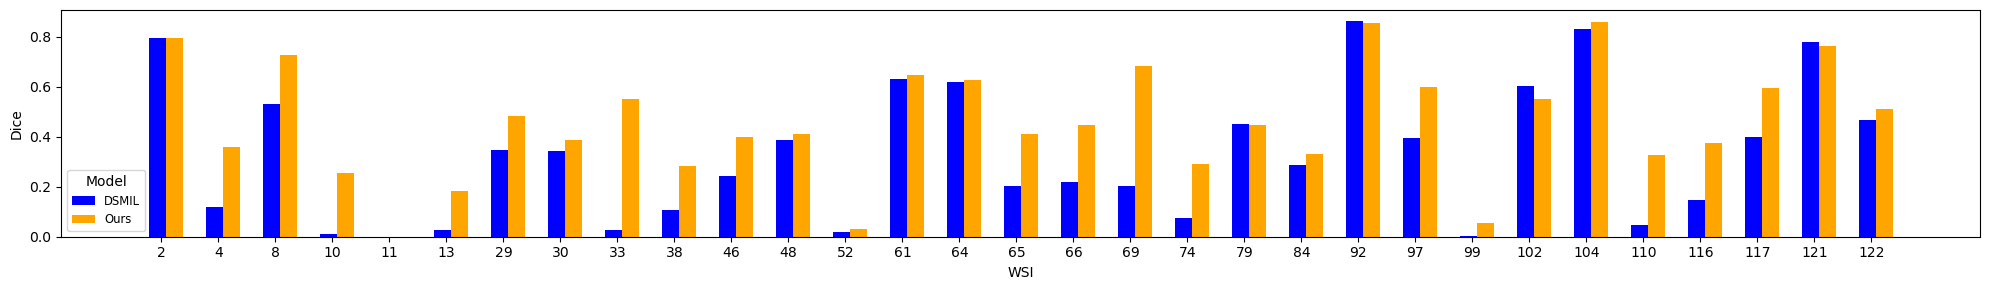

In [193]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import numpy as np
plt.figure(figsize=(20,3))
x = x[:-17]
x2 = x2[:-17]

x_mean = np.mean([x,x2], axis=0)

x_major_locator = MultipleLocator(10)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)

plt.bar(x,new_origin,color='b',width=1.5, align='edge', label = 'DSMIL')  # 第一組數據靠左邊緣對齊
plt.bar(x2,new_ours,color='orange',width=1.5, label = 'Ours')  
# 第二組數據置中對齊
plt.legend(loc='lower left', title='Model', fontsize = 'small')
plt.xticks(ticks = x_mean, labels=new_name)
plt.ylabel('Dice')
plt.xlabel('WSI')
plt.tight_layout()
plt.savefig('/data3/ian/plot.png')
plt.show()


In [151]:
for i in range(len(x)):
    assert(x2[i]-x[i] == 0.75)
